## Modeling 

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import statsmodels.api as sm


In [9]:
df = pd.read_csv(r'C:\Users\tonym\Documents\Flatiron\phase_2\Project2\notebooks\Tony\cleanhousedata.csv')

In [10]:
df.head()

,price,view,sqft_living,sqft_lot,bedrooms,bathrooms
0,221900.0,4,1180,5650,2,2
1,538000.0,4,2570,7242,2,7
2,180000.0,4,770,10000,1,2
3,604000.0,4,1960,5000,3,10
4,510000.0,4,1680,8080,2,6


In [25]:
df['view'].value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        4
2        4
3        4
4        4
        ..
21005    4
21006    4
21007    4
21008    4
21009    4
Name: view, Length: 21010, dtype: int64>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21010 entries, 0 to 21009
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21010 non-null  float64
 1   view         21010 non-null  int64  
 2   sqft_living  21010 non-null  int64  
 3   sqft_lot     21010 non-null  int64  
 4   bedrooms     21010 non-null  int64  
 5   bathrooms    21010 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 985.0 KB


In [12]:
df.corr().abs()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.682794
bathrooms      0.507509
bedrooms       0.319988
view           0.297368
sqft_lot       0.126884
Name: price, dtype: float64

### Function to Check Linearity 

In [13]:
def check_assumptions(X_train, y_train, train_preds, test_preds, y_test):
    """
    Creates graphs to assist in checking the assumptions of linearity.

    :param X_train: X values of model
    :param y_train: Values for 'price' in training dataset
    :param train_preds: Predicted values for 'price' in training dataset
    :param test_preds: Predicted values for 'price' in test dataset
    :param y_test: Values for 'price' in training dataset
    :return:
    """
    # Check Linearity
    train_df = pd.concat([X_train, y_train], axis=1)
    train_df.corr().price.sort_values(ascending=False)
    sns.pairplot(train_df)
    plt.show()

    # Check Multicollinearity
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(train_df.corr(), annot=True, )
    plt.show()

    # Check for residual normality
    train_residuals = y_train - train_preds
    sm.qqplot(train_residuals, line='r');
    test_residuals = y_test - test_preds
    sm.qqplot(test_residuals, line='r');

    # Checking heteroskedacity
    plt.scatter(train_preds, train_residuals, label='Train')
    plt.scatter(test_preds, test_residuals, label='Test')

    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()


### Begin to split into train and test 

In [14]:
X = df.drop(columns=['price', 'sqft_lot'])
y = df['price']

In [15]:
# Train / Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,view,sqft_living,bedrooms,bathrooms,price
1547,4,1920,2,6,443500.0
7387,4,2910,3,8,805000.0
2584,4,2153,2,8,259000.0
19036,4,2250,2,6,328000.0
12447,4,1580,3,5,787500.0
...,...,...,...,...,...
11284,4,2640,3,9,395000.0
11964,4,1140,1,4,518000.0
5390,4,1280,2,2,227000.0
860,4,1330,2,4,374000.0


<AxesSubplot:>

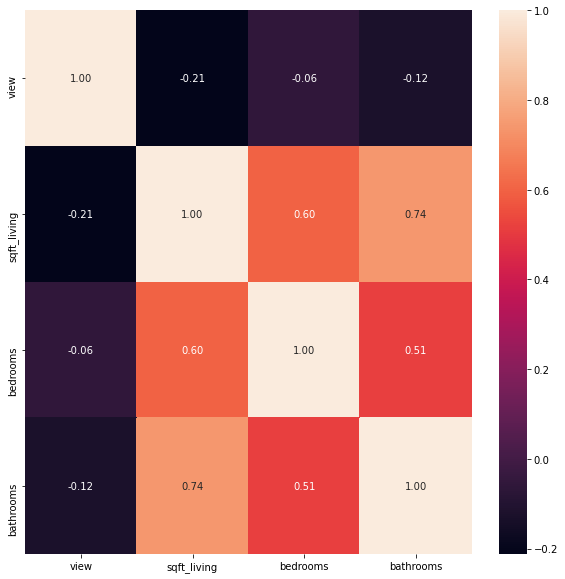

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, fmt = '.2f')

In [64]:
print("X train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X train:


,view,sqft_living,sqft_lot,bedrooms,bathrooms
count,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000
mean,3.739608,2047.495082,10412.887669,2.368027,6.397220
std,0.899162,857.471015,11800.634470,0.895704,2.989242
min,0.000000,370.000000,520.000000,0.000000,0.000000
25%,4.000000,1420.000000,5000.000000,2.000000,4.000000
50%,4.000000,1900.000000,7500.000000,2.000000,7.000000
75%,4.000000,2520.000000,10300.000000,3.000000,8.000000
max,4.000000,7880.000000,104544.000000,8.000000,24.000000


X Test:


,view,sqft_living,sqft_lot,bedrooms,bathrooms
count,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000
mean,3.721302,2051.367028,10392.027032,2.354464,6.400343
std,0.929952,882.123575,11598.095736,0.895745,3.024056
min,0.000000,380.000000,600.000000,0.000000,0.000000
25%,4.000000,1410.000000,5089.000000,2.000000,4.000000
50%,4.000000,1890.000000,7620.000000,2.000000,7.000000
75%,4.000000,2520.000000,10280.000000,3.000000,8.000000
max,4.000000,7480.000000,105415.000000,8.000000,26.000000


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

 ## Model of sqft_living and price 

In [18]:
model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                 1.216e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:18:23   Log-Likelihood:            -1.9364e+05
No. Observations:               14076   AIC:                         3.873e+05
Df Residuals:                   14074   BIC:                         3.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.783e+04   4978.310      3.581      0.000    8067.593    2.76e+04
sqft_living   247.8891      2.248    110.286      0.000     243.483     252.295
==============================================================================
Omnibus:                     5062.950   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29725.824
Skew:                           1.615   Prob(JB):                         0.00
Kurtosis:                       9.345   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check linear assumptions sqft_living and Price 

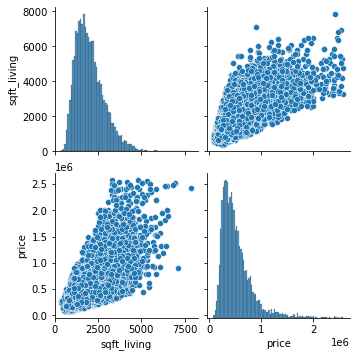

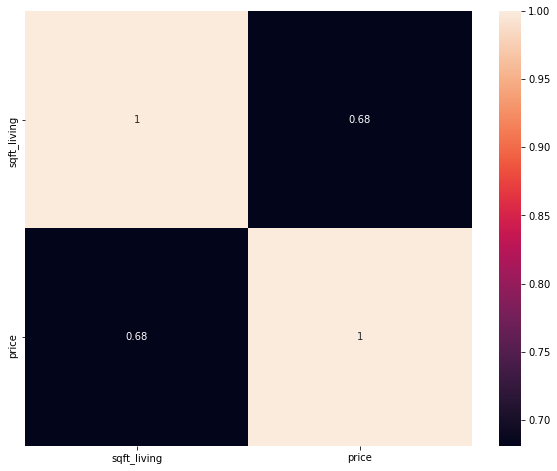

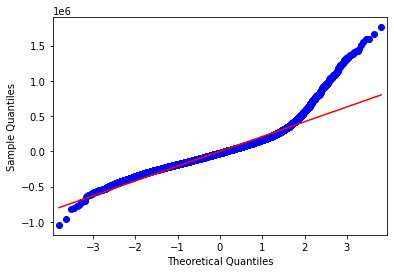

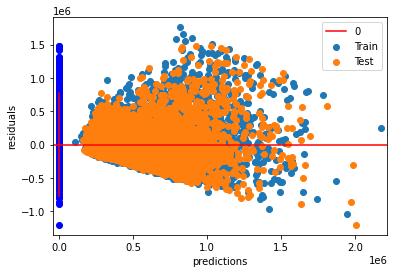

In [22]:
check_assumptions(X_train['sqft_living'], y_train, train_preds, test_preds, y_test)

## Model of bedrooms and price 

In [23]:
model = sm.OLS(y_train, sm.add_constant(X_train['bedrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1550.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.30e-321
Time:                        23:25:34   Log-Likelihood:            -1.9728e+05
No. Observations:               14076   AIC:                         3.946e+05
Df Residuals:                   14074   BIC:                         3.946e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.652e+05   7037.885     37.677      0.000    2.51e+05    2.79e+05
bedrooms    1.096e+05   2784.371     39.364      0.000    1.04e+05    1.15e+05
==============================================================================
Omnibus:                     6605.575   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45522.319
Skew:                           2.153   Prob(JB):                         0.00
Kurtosis:                      10.686   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check linear assumptions Bedrooms and Price 

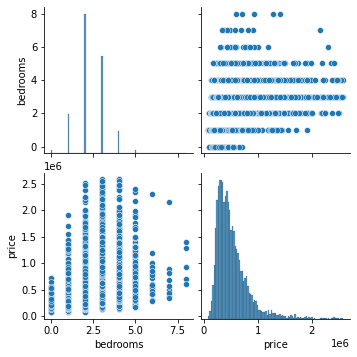

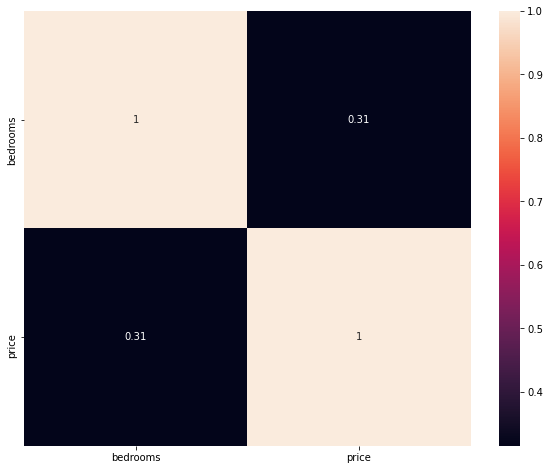

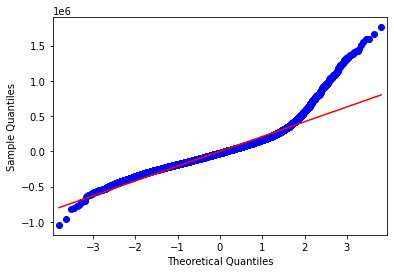

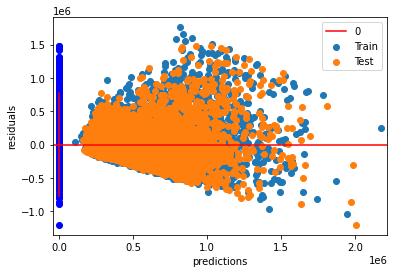

In [24]:
check_assumptions(X_train['bedrooms'], y_train, train_preds, test_preds, y_test)

## Model of bedrooms and price 

In [26]:
model = sm.OLS(y_train, sm.add_constant(X_train['bathrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     4831.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:32:53   Log-Likelihood:            -1.9594e+05
No. Observations:               14076   AIC:                         3.919e+05
Df Residuals:                   14074   BIC:                         3.919e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.878e+05   5343.826     35.150      0.000    1.77e+05    1.98e+05
bathrooms   5.261e+04    756.849     69.509      0.000    5.11e+04    5.41e+04
==============================================================================
Omnibus:                     5918.183   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36842.513
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                       9.936   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check linear assumptions bathrooms and Price 

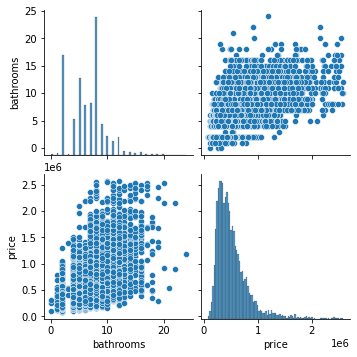

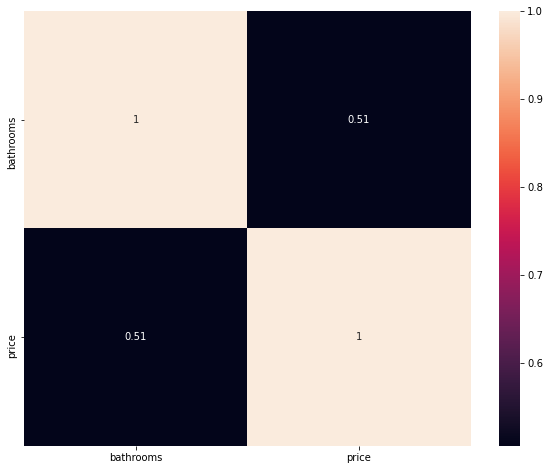

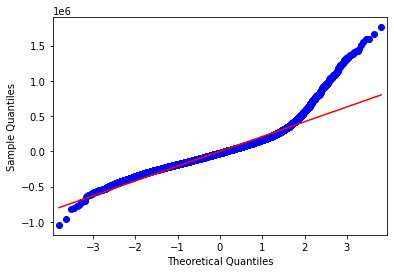

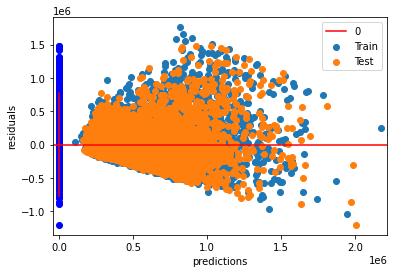

In [27]:
check_assumptions(X_train['bathrooms'], y_train, train_preds, test_preds, y_test)

## Model of bedrooms and bathrooms and price 

In [30]:
model = sm.OLS(y_train, sm.add_constant(X_train[['bedrooms', 'bathrooms']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2469.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:52:24   Log-Likelihood:            -1.9590e+05
No. Observations:               14076   AIC:                         3.918e+05
Df Residuals:                   14073   BIC:                         3.918e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.517e+05   6702.619     22.636      0.000    1.39e+05    1.65e+05
bedrooms    2.614e+04   2941.866      8.884      0.000    2.04e+04    3.19e+04
bathrooms   4.859e+04    879.648     55.242      0.000    4.69e+04    5.03e+04
==============================================================================
Omnibus:                     5935.176   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37413.077
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                      10.003   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model of view and price 

In [31]:
model = sm.OLS(y_train, sm.add_constant(X_train['view'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1315.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.71e-275
Time:                        00:05:32   Log-Likelihood:            -1.9739e+05
No. Observations:               14076   AIC:                         3.948e+05
Df Residuals:                   14074   BIC:                         3.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e+05   1.07e+04     84.158      0.000    8.81e+05    9.23e+05
view        -1.01e+05   2786.521    -36.259      0.000   -1.06e+05   -9.56e+04
==============================================================================
Omnibus:                     6521.654   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43681.593
Skew:                           2.130   Prob(JB):                         0.00
Kurtosis:                      10.505   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

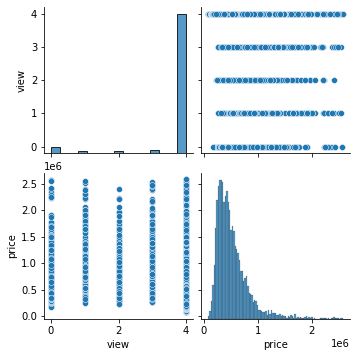

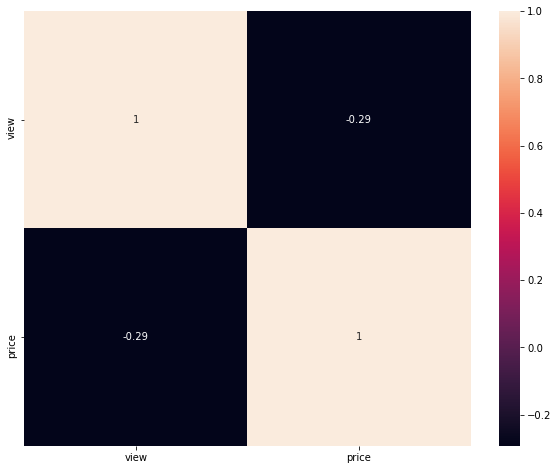

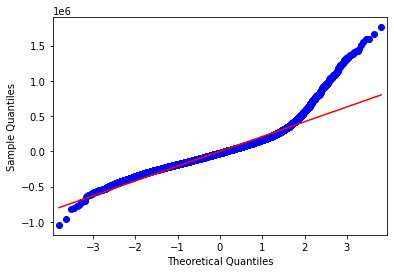

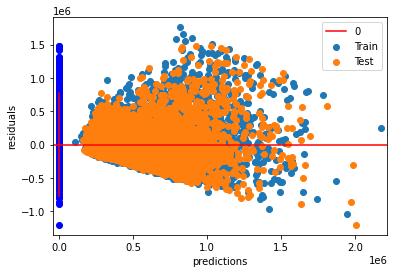

In [32]:
check_assumptions(X_train['view'], y_train, train_preds, test_preds, y_test)